Використай цей шаблон в роботі з датасетом.    
Ти можеш додавати комірки за потреби, але не змінюй структуру і послідовність питань.    
Обмежся функціями з наведених бібліотек.

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

1. Переглянь список .json файлів, доступних за адресою https://github.com/prust/wikipedia-movie-data/tree/master.    
Відкрий будь-який файл, що містить у своїй назві рік і ознайомся з його структурою.    
Тепер сформуй список файлів, які ти будеш завантажувати.    
Для формування послідовності слід використати функцію numpy.arange.    
Довжина послідовності має становити не менше 5 датасетів(наприклад з 1960 по 2000  рік включно).    
Повну адресу сформуй через конкатенацію рядків.

In [ ]:
#Обираємо файли з роками
json_dir = "https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/"

years = np.arange(1960, 2001, 10)
files = [f"movies-{str(y)}s.json" for y in years]

files

['movies-1960s.json',
 'movies-1970s.json',
 'movies-1980s.json',
 'movies-1990s.json',
 'movies-2000s.json']

In [ ]:
#Завантажуємо та об’єднюємо JSON-файли
all_movies = []

for file in files:
    file_path = json_dir + file
    df = pd.read_json(file_path)
    all_movies.append(df)

movies_df = pd.concat(all_movies, ignore_index=True)
all_movies

[                                   title  year  \
 0                          The 3rd Voice  1960   
 1                         12 to the Moon  1960   
 2                        13 Fighting Men  1960   
 3                              13 Ghosts  1960   
 4     The Adventures of Huckleberry Finn  1960   
 ...                                  ...   ...   
 1577                   Young Billy Young  1969   
 1578                Bambi Meets Godzilla  1969   
 1579                 Czechoslovakia 1968  1969   
 1580       The Fantastic Plastic Machine  1969   
 1581                            Salesman  1969   
 
                                                    cast  \
 0           [Edmond O'Brien, Laraine Day, Julie London]   
 1                               [Ken Clark, Tom Conway]   
 2                     [Grant Williams, Carole Matthews]   
 3                          [Charles Herbert, Jo Morrow]   
 4     [Tony Randall, Patty McCormack, Eddie Hodges, ...   
 ...                      

2. Тепер послідовність дій наступна.   
Слід пройти по всім обраним тобою файлам, прочитати кожен, як json об'єкт.        
Позбутись зайвих стовпців: ['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height'].     
Залишити лише повні рядки(рядки без пропущених значень).     
Об'єднати інформацію з усіх файлів в єдиний датасет.

In [ ]:
#Видаляємо зайві стовпці
columns_to_drop = [
    'href', 'extract', 'thumbnail',
    'thumbnail_width', 'thumbnail_height'
]

movies_df = movies_df.drop(columns=columns_to_drop)
movies_df


,title,year,cast,genres
0,The 3rd Voice,1960,"[Edmond O'Brien, Laraine Day, Julie London]","[Mystery, Crime, Drama, Noir, Thriller]"
1,12 to the Moon,1960,"[Ken Clark, Tom Conway]","[Science Fiction, Independent]"
2,13 Fighting Men,1960,"[Grant Williams, Carole Matthews]","[War, Drama]"
3,13 Ghosts,1960,"[Charles Herbert, Jo Morrow]","[Horror, Supernatural]"
4,The Adventures of Huckleberry Finn,1960,"[Tony Randall, Patty McCormack, Eddie Hodges, ...","[Family, Drama]"
...,...,...,...,...
10745,The Imaginarium of Doctor Parnassus,2009,"[Heath Ledger, Christopher Plummer, Verne Troy...",[Fantasy]
10746,It's Complicated,2009,"[Meryl Streep, Steve Martin, Alec Baldwin, Joh...","[Comedy, Romance]"
10747,Sherlock Holmes,2009,"[Robert Downey Jr., Jude Law, Rachel McAdams, ...","[Action, Mystery, Historical]"
10748,The Loss of a Teardrop Diamond,2009,"[Bryce Dallas Howard, Chris Evans, Ellen Burst...",[Independent]


In [ ]:
#Залишаємо лише повні рядки
movies_df = movies_df.dropna()


3. Перевір розмір фінального датасету. Він має включати 4(чотири) стовпчика. Кількість рядків залежить від обраної кількості файлів. Збережи собі копію у вигляді csv або json файлу. Це убезпечить тебе від форс-мажорів.

In [ ]:
movies_df.info()
movies_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10750 entries, 0 to 10749
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10750 non-null  object
 1   year    10750 non-null  int64 
 2   cast    10750 non-null  object
 3   genres  10750 non-null  object
dtypes: int64(1), object(3)
memory usage: 336.1+ KB


,title,year,cast,genres
0,The 3rd Voice,1960,"[Edmond O'Brien, Laraine Day, Julie London]","[Mystery, Crime, Drama, Noir, Thriller]"
1,12 to the Moon,1960,"[Ken Clark, Tom Conway]","[Science Fiction, Independent]"
2,13 Fighting Men,1960,"[Grant Williams, Carole Matthews]","[War, Drama]"
3,13 Ghosts,1960,"[Charles Herbert, Jo Morrow]","[Horror, Supernatural]"
4,The Adventures of Huckleberry Finn,1960,"[Tony Randall, Patty McCormack, Eddie Hodges, ...","[Family, Drama]"


In [ ]:
#Зберігаємо копії датасету
movies_df.to_csv("movies_final.csv", index=False)
from google.colab import files
files.download("movies_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
movies_df.to_json(
    "movies_final.json",
    orient="records",
    force_ascii=False,
    indent=2
)
from google.colab import files
files.download("movies_final.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4. Для json файлу не варто використовувати метод describe. Файл містить вкладені структури.    
Перевір вміст перших рядочків і використай метод info.

In [ ]:
movies_df.head()
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10750 entries, 0 to 10749
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10750 non-null  object
 1   year    10750 non-null  int64 
 2   cast    10750 non-null  object
 3   genres  10750 non-null  object
dtypes: int64(1), object(3)
memory usage: 336.1+ KB


5. Тепер слід попрацювати з жанрами.    
Віднайди топ 10 жанрів за кількістю фільмів.    
Побудуй стовпчикову та кругову діаграму, а також виведи на екран підсумкову таблицю.

In [ ]:
# Розгортання списків жанрів
genres_series = movies_df.explode('genres')['genres']
top_genres = genres_series.value_counts().head(10)
top_genres

,count
genres,
Comedy,3777
Drama,3758
Action,1228
Thriller,1158
Horror,1044
Romance,948
Crime,873
Science Fiction,708
Adventure,556


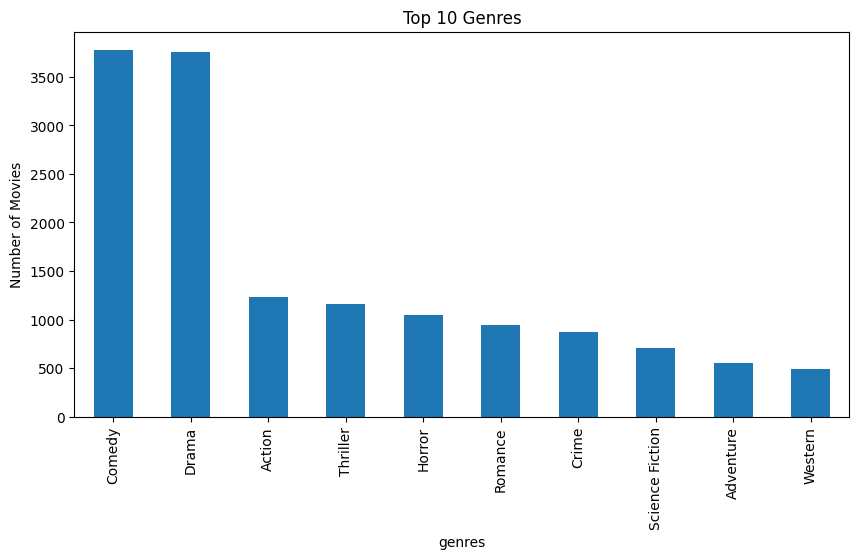

In [ ]:
#Стовпчикова діаграма
plt.figure(figsize=(10, 5))
top_genres.plot(kind='bar')
plt.title("Top 10 Genres")
plt.ylabel("Number of Movies")
plt.show()

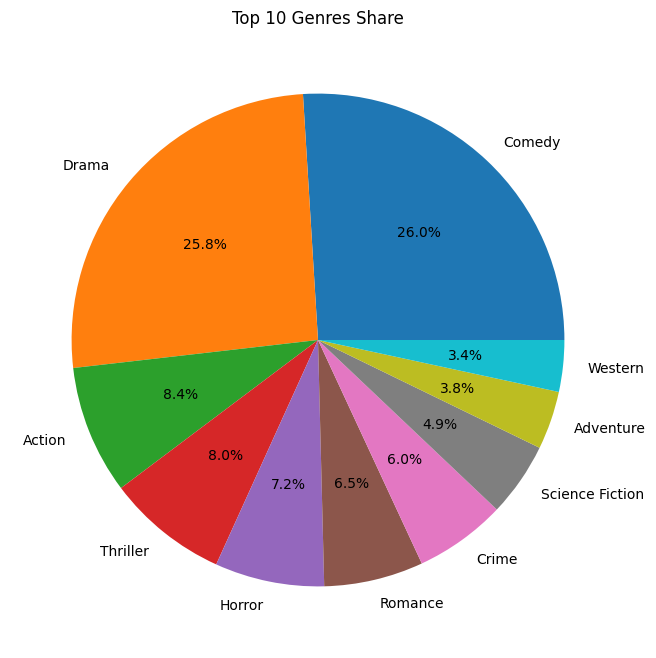

In [ ]:
#Кругова діаграма
plt.figure(figsize=(8, 8))
top_genres.plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 10 Genres Share")
plt.ylabel("")
plt.show()

In [ ]:
#Підсумкова таблиця
genres_table = (
    movies_df
    .explode('genres')
    .groupby('genres')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='movies_count')
)

genres_table

,genres,movies_count
0,Comedy,3777
1,Drama,3758
2,Action,1228
3,Thriller,1158
4,Horror,1044
5,Romance,948
6,Crime,873
7,Science Fiction,708
8,Adventure,556
9,Western,492


6. Тепер вибери 3 найпопулярніших жанри і подивись, як змінювалась їх популярність впродовж обраного тобою часового періода.     
Для цього підрахуй кількість фільмів в кожному жанрі за кожен рік спостереження.    
Виведи результат у вигляді лінійного графіка.

In [ ]:
#Динаміка 3 найпопулярніших жанрів
top3_genres = top_genres.head(3).index.tolist()

genre_year = (
    movies_df
    .explode('genres')
    .query("genres in @top3_genres")
    .groupby(['year', 'genres'])
    .size()
    .unstack(fill_value=0)
)

genre_year


genres,Action,Comedy,Drama
year,,,
1960,4,30,63
1961,5,42,74
1962,2,38,63
1963,2,55,42
1964,3,54,46
1965,4,47,44
1966,9,55,38
1967,8,56,37
1968,10,53,58


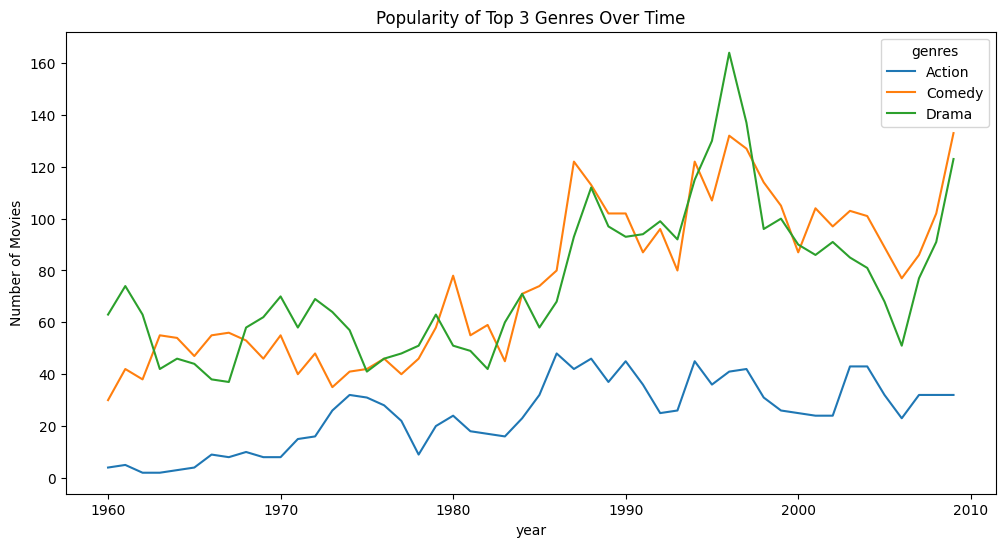

In [ ]:
#Лінійний графік
genre_year.plot(figsize=(12, 6))
plt.title("Popularity of Top 3 Genres Over Time")
plt.ylabel("Number of Movies")
plt.show()


7. Тепер слід попрацювати з акторами.     
Віднайди топ 10 акторів за кількістю фільмів.    
Побудуй стовпчикову або кругову діаграму, а також виведи на екран підсумукову таблицю.

In [ ]:
actors_series = movies_df.explode('cast')['cast']
top_actors = actors_series.value_counts().head(10)
top_actors


,count
cast,
Gene Hackman,71
Robert Duvall,68
Robert De Niro,65
Burt Reynolds,63
Harvey Keitel,58
Christopher Walken,57
Donald Sutherland,57
Samuel L. Jackson,55
Michael Caine,54


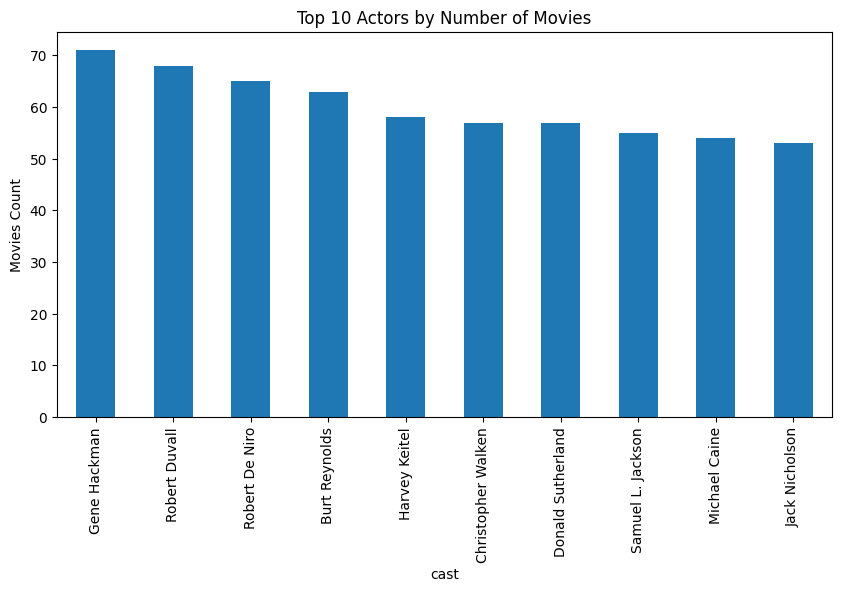

In [ ]:
#Стовпчикова діаграма
plt.figure(figsize=(10, 5))
top_actors.plot(kind='bar')
plt.title("Top 10 Actors by Number of Movies")
plt.ylabel("Movies Count")
plt.show()


In [ ]:
#Підсумкова таблиця
actors_table = (
    movies_df
    .explode('cast')
    .groupby('cast')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='movies_count')
)

actors_table

,cast,movies_count
0,Gene Hackman,71
1,Robert Duvall,68
2,Robert De Niro,65
3,Burt Reynolds,63
4,Harvey Keitel,58
5,Donald Sutherland,57
6,Christopher Walken,57
7,Samuel L. Jackson,55
8,Michael Caine,54
9,Jack Nicholson,53


8. Тепер вибери 3 найпопулярніших актори і подивись, як змінювалась їх популярність впродовж обраного тобою часового періода.
Для цього підрахуй кількість фільмів для кожного актора за кожен рік спостереження.    
Виведи результат у вигляді лінійного графіка.

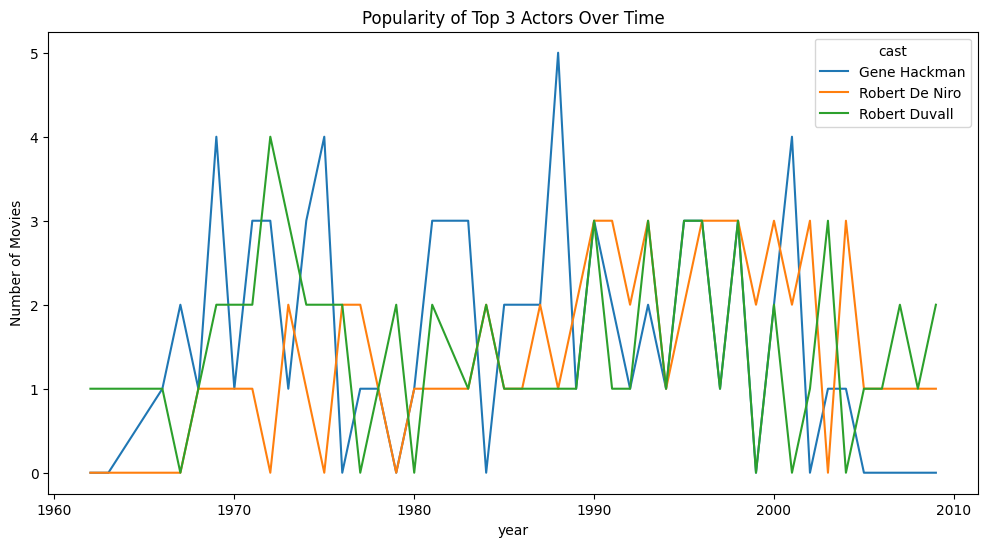

In [ ]:
top3_actors = top_actors.head(3).index.tolist()

actor_year = (
    movies_df
    .explode('cast')
    .query("cast in @top3_actors")
    .groupby(['year', 'cast'])
    .size()
    .unstack(fill_value=0)
)

actor_year.plot(figsize=(12, 6))
plt.title("Popularity of Top 3 Actors Over Time")
plt.ylabel("Number of Movies")
plt.show()


Аналіз зміни популярності трьох найактивніших акторів у часі показав:
1)акторська активність не є рівномірною протягом усього періоду;
2)	можна спостерігати періоди пікової популярності;
3)	динаміка може бути пов’язана з етапами кар’єри, змінами ролей або загальною кількістю кінопроєктів у певні роки.


***Бонусне завдання***       
Зосередься лише на 10 найпопулярніших акторах.     
 Порахуй, як часто кожен актор з'являється в фільмі, що належить до категорії топ-3 найпопулярніших жанри, та як часто в фільмі, що не включає топовий жанр.  
 Оціни пропорції для кожного актора у вигляді стовпчикової діаграми та у вигляді таблиці, де вказано також відсоток фільмів в топ жанрах.

In [ ]:
top10_actors = top_actors.index.tolist()
top3_genres = top_genres.head(3).index.tolist()

df_expanded = movies_df.explode('cast').explode('genres')
df_expanded = df_expanded[df_expanded['cast'].isin(top10_actors)]

df_expanded['is_top_genre'] = df_expanded['genres'].isin(top3_genres)

bonus = (
    df_expanded
    .groupby(['cast', 'is_top_genre'])
    .size()
    .unstack(fill_value=0)
)

bonus['total'] = bonus.sum(axis=1)
bonus['top_genre_%'] = bonus[True] / bonus['total'] * 100

bonus


is_top_genre,False,True,total,top_genre_%
cast,,,,
Burt Reynolds,55,75,130,57.692308
Christopher Walken,66,55,121,45.454545
Donald Sutherland,65,50,115,43.478261
Gene Hackman,93,59,152,38.815789
Harvey Keitel,66,55,121,45.454545
Jack Nicholson,57,48,105,45.714286
Michael Caine,59,48,107,44.859813
Robert De Niro,73,66,139,47.482014
Robert Duvall,66,61,127,48.031496


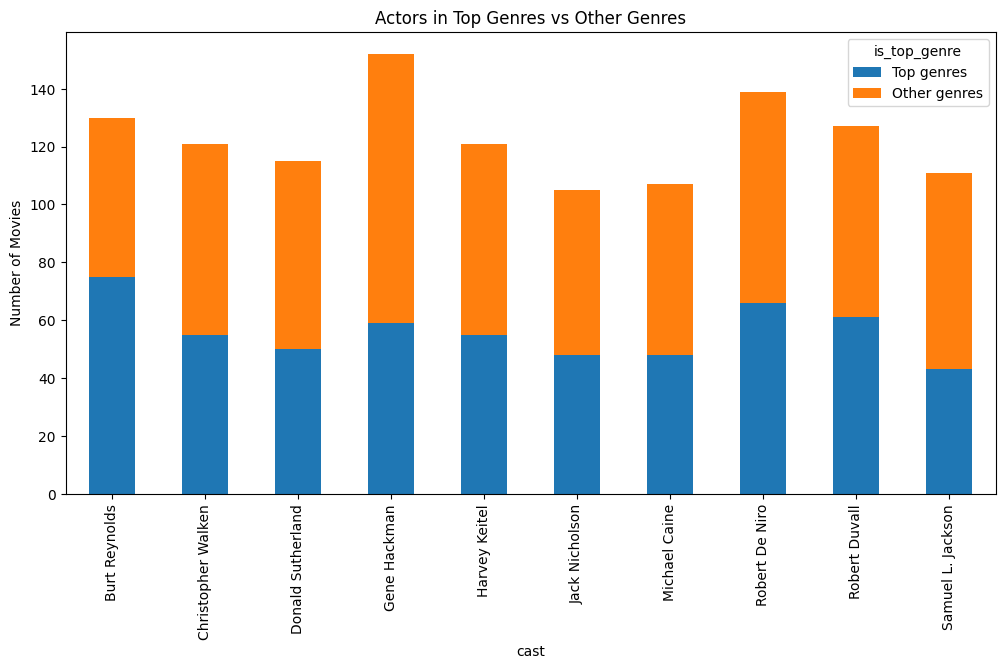

In [ ]:
# Переіменовуємо щоб уникнути True і False
bonus_renamed = bonus.rename(
    columns={True: 'Top genres', False: 'Other genres'}
)

bonus_renamed[['Top genres', 'Other genres']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)
plt.title("Actors in Top Genres vs Other Genres")
plt.ylabel("Number of Movies")
plt.show()

